In [1]:
import cv2
import matplotlib.pyplot as plt
import utilities as utils
import os
import metrics
import filters
import visualization as vis
from sklearn.metrics import mean_squared_error


erge

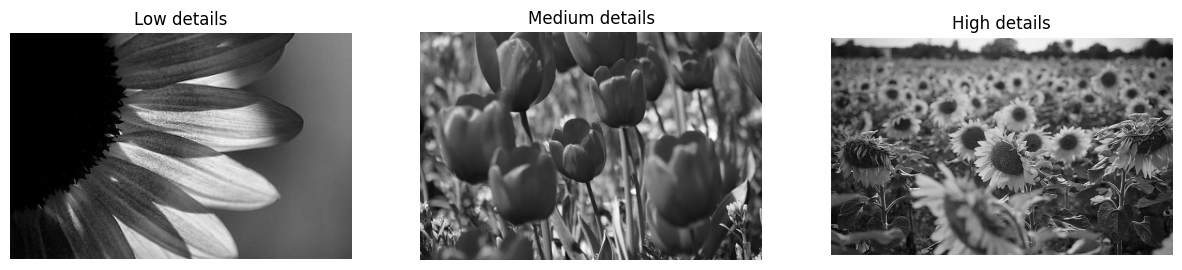

In [3]:
list_of_images = []
PATH = 'images'

images_dir = os.listdir(PATH)
images_dir.sort()

# Iterate over images
for images in images_dir:  # Taking first 10 images for example
    image = cv2.imread(os.path.join(PATH, images), cv2.IMREAD_GRAYSCALE)
    list_of_images.append(image)

titles = ["Low details", "Medium details", "High details"]
    
vis.plot_images(list_of_images, titles)

In [4]:
dataframes = []

for image in list_of_images:
    df = utils.create_dataframe_image(image)
    dataframes.append(df)

In [5]:
# Iterate over all images and save in a tree structured directory

kernel_sizes = [(2*i + 1) for i in range(1, 5)]

utils.create_or_replace_dir('Images_filtered')


for i in range(len(dataframes)):
    filters.save_filtered_images(dataframes[i], f'image_{i}', kernel_sizes=kernel_sizes)

In [12]:
base_dir = 'Images_filtered'
original_image_name = 'image_0'
noise_levels = os.listdir(os.path.join(base_dir, original_image_name))
noise_types = os.listdir(os.path.join(base_dir, original_image_name, noise_levels[0]))
filter_types = os.listdir(os.path.join(base_dir, original_image_name, noise_levels[0], noise_types[0]))

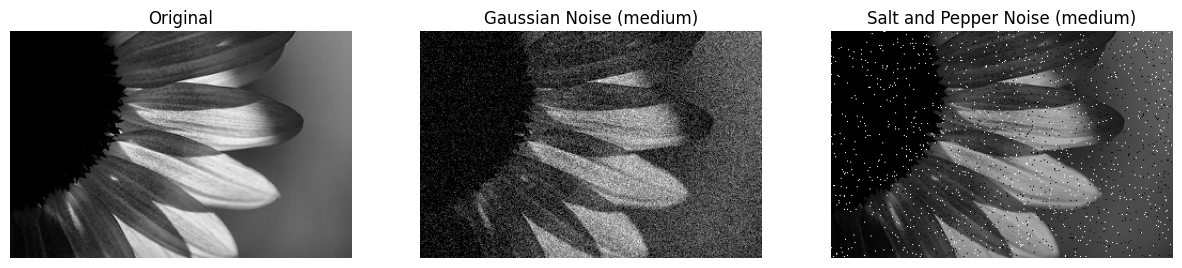

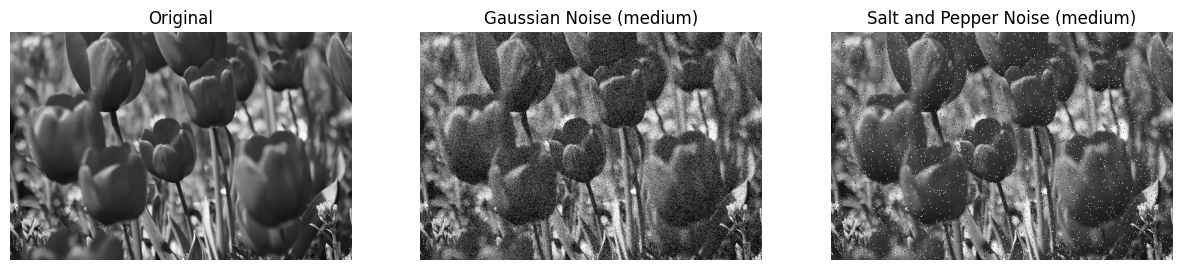

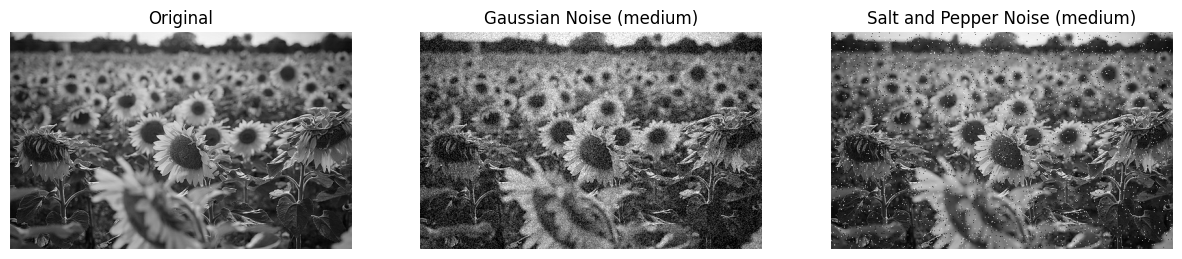

In [13]:
# Define the noise types to display

noise_types = ['Gaussian Noise (medium)', 'Salt and Pepper Noise (medium)']

# Iterate over all images
for i, image in enumerate(list_of_images):
    fig, axes = plt.subplots(1, 3, figsize=(15, 5))
    
    # Display the original image
    axes[0].imshow(image, cmap='gray')
    axes[0].set_title('Original')
    axes[0].axis('off')
    
    # Display the noisy variants
    for j, noise_type in enumerate(noise_types):
        noisy_image = dataframes[i].loc[noise_type, 'Image']
        axes[j + 1].imshow(noisy_image, cmap='gray')
        axes[j + 1].set_title(noise_type)
        axes[j + 1].axis('off')
    
    plt.show()

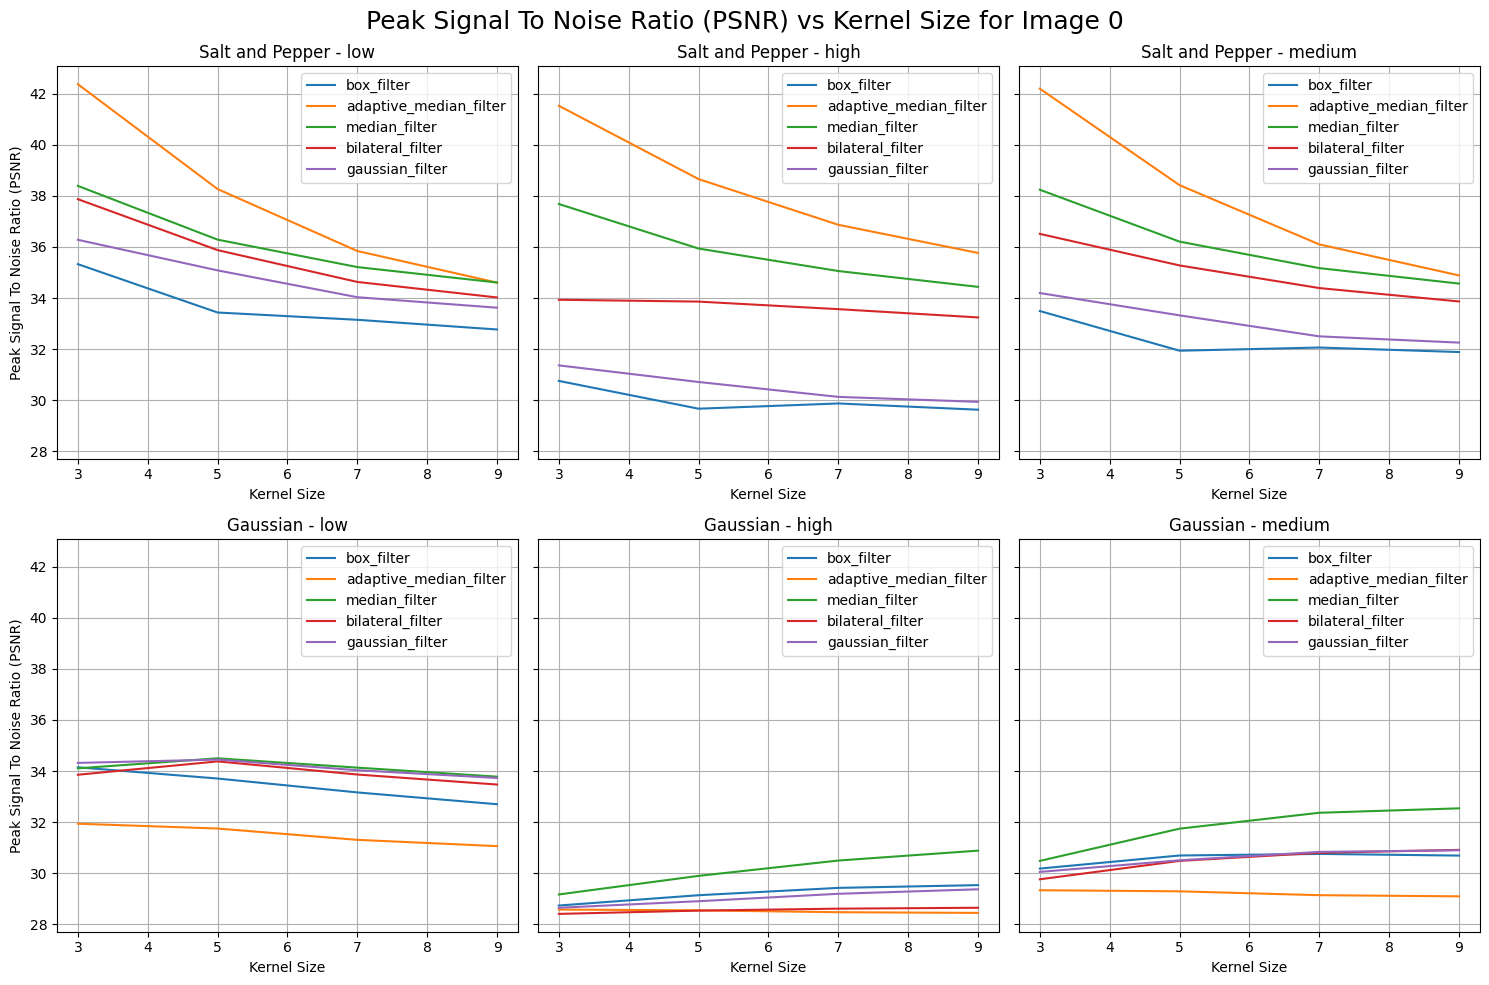

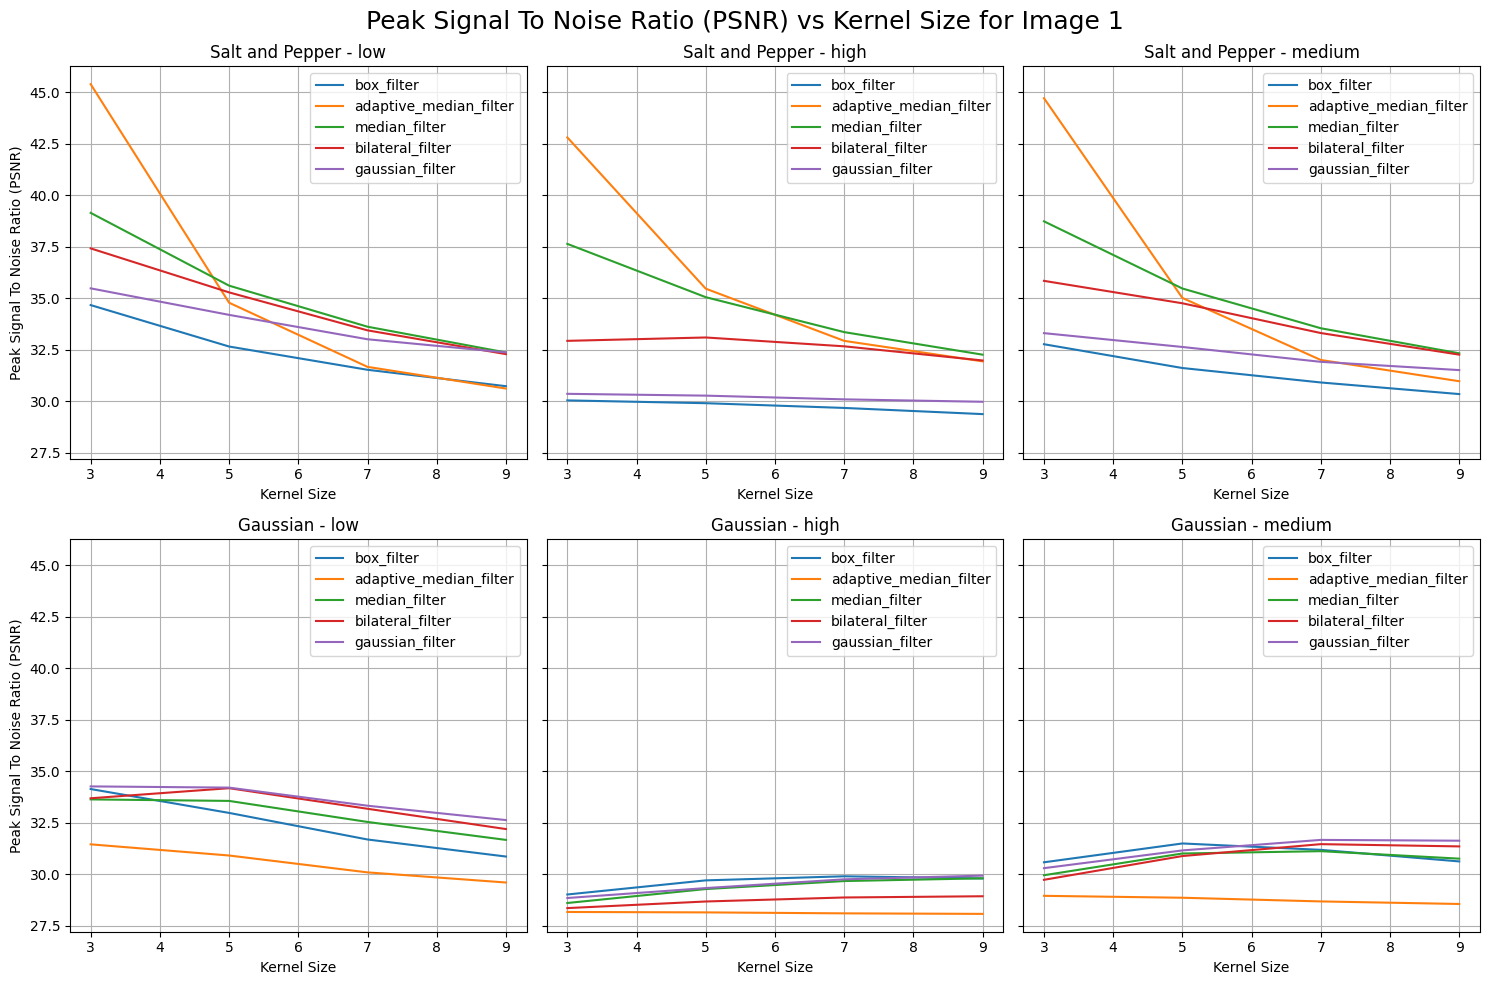

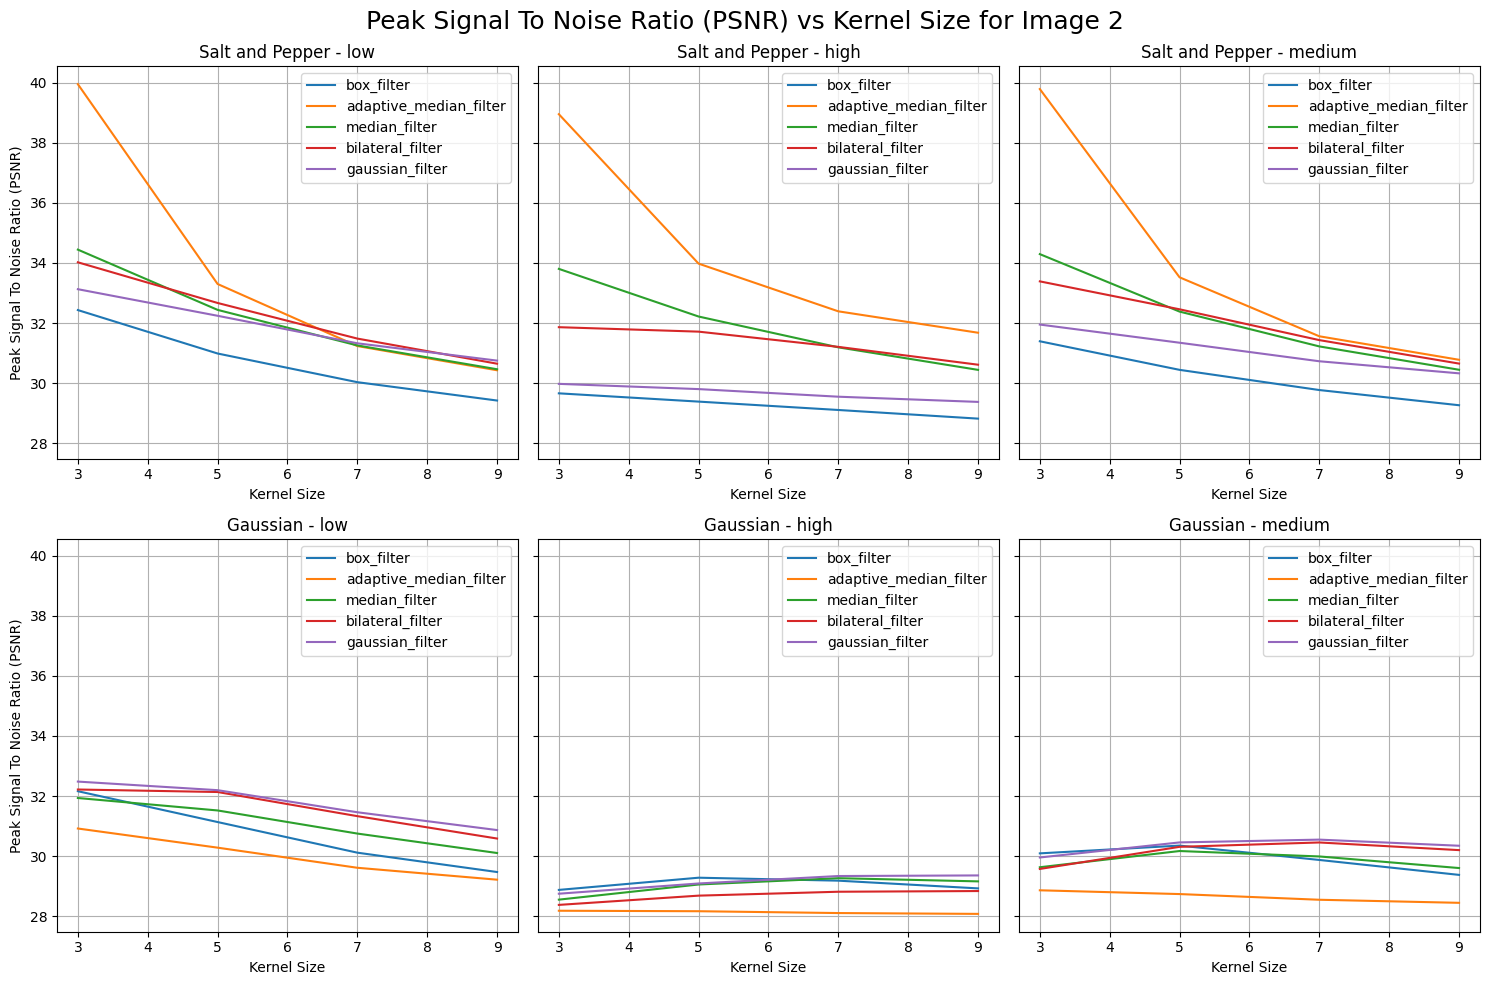

In [14]:
for i in range(len(dataframes)):


  original_image_name = f'image_{i}'
  original_image = dataframes[i].loc['no_noise', 'Image']
    
  psnr_dict_outer, kernels = metrics.collect_metric_values_for_all_filters_and_noise_types(metrics.calculate_psnr,
                                                                                        base_dir,
                                                                                        original_image_name,
                                                                                        original_image
                                                                                      )

  vis.plot_metric_vs_kernel(psnr_dict_outer,
                            'Peak Signal To Noise Ratio (PSNR)',
                            noise_levels, filter_types,
                            kernels,
                            i  
                            )

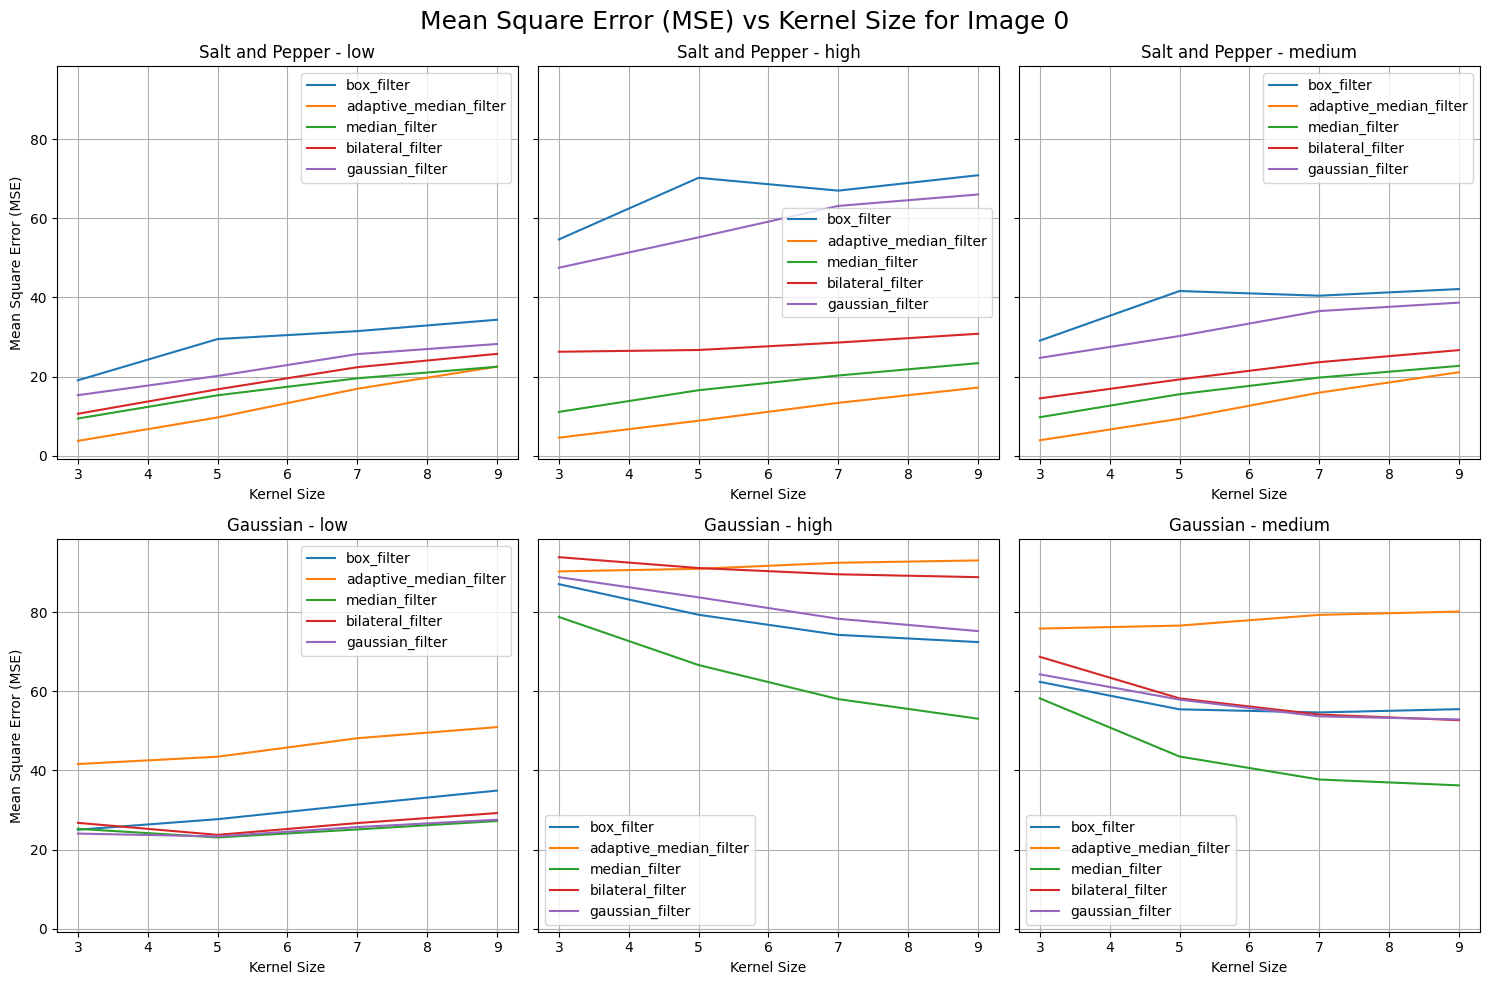

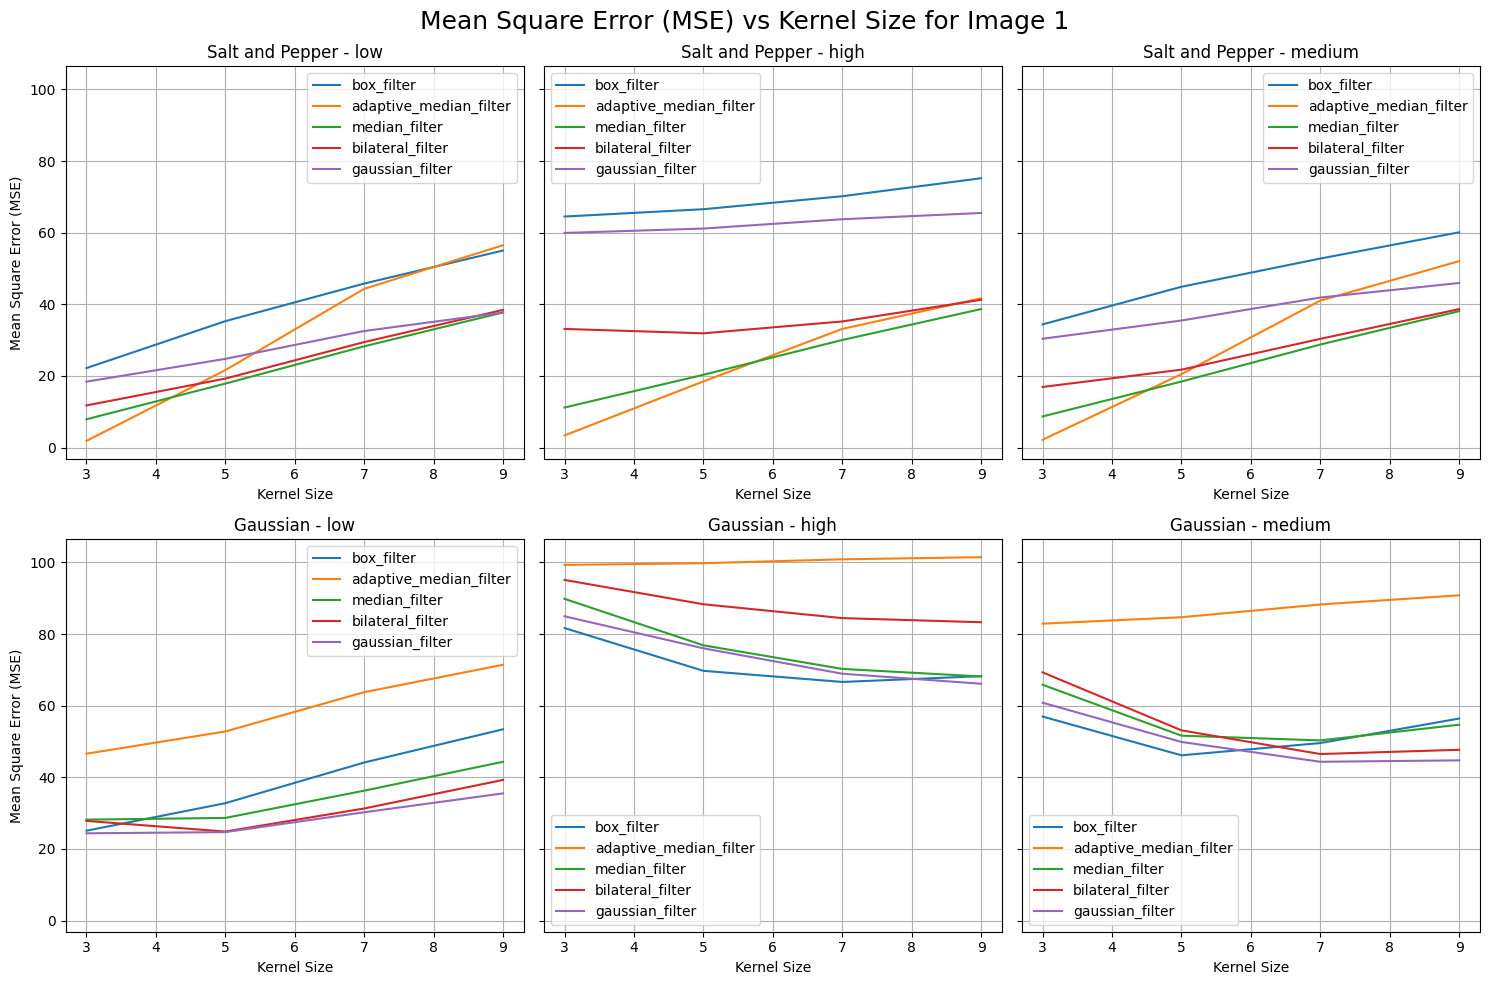

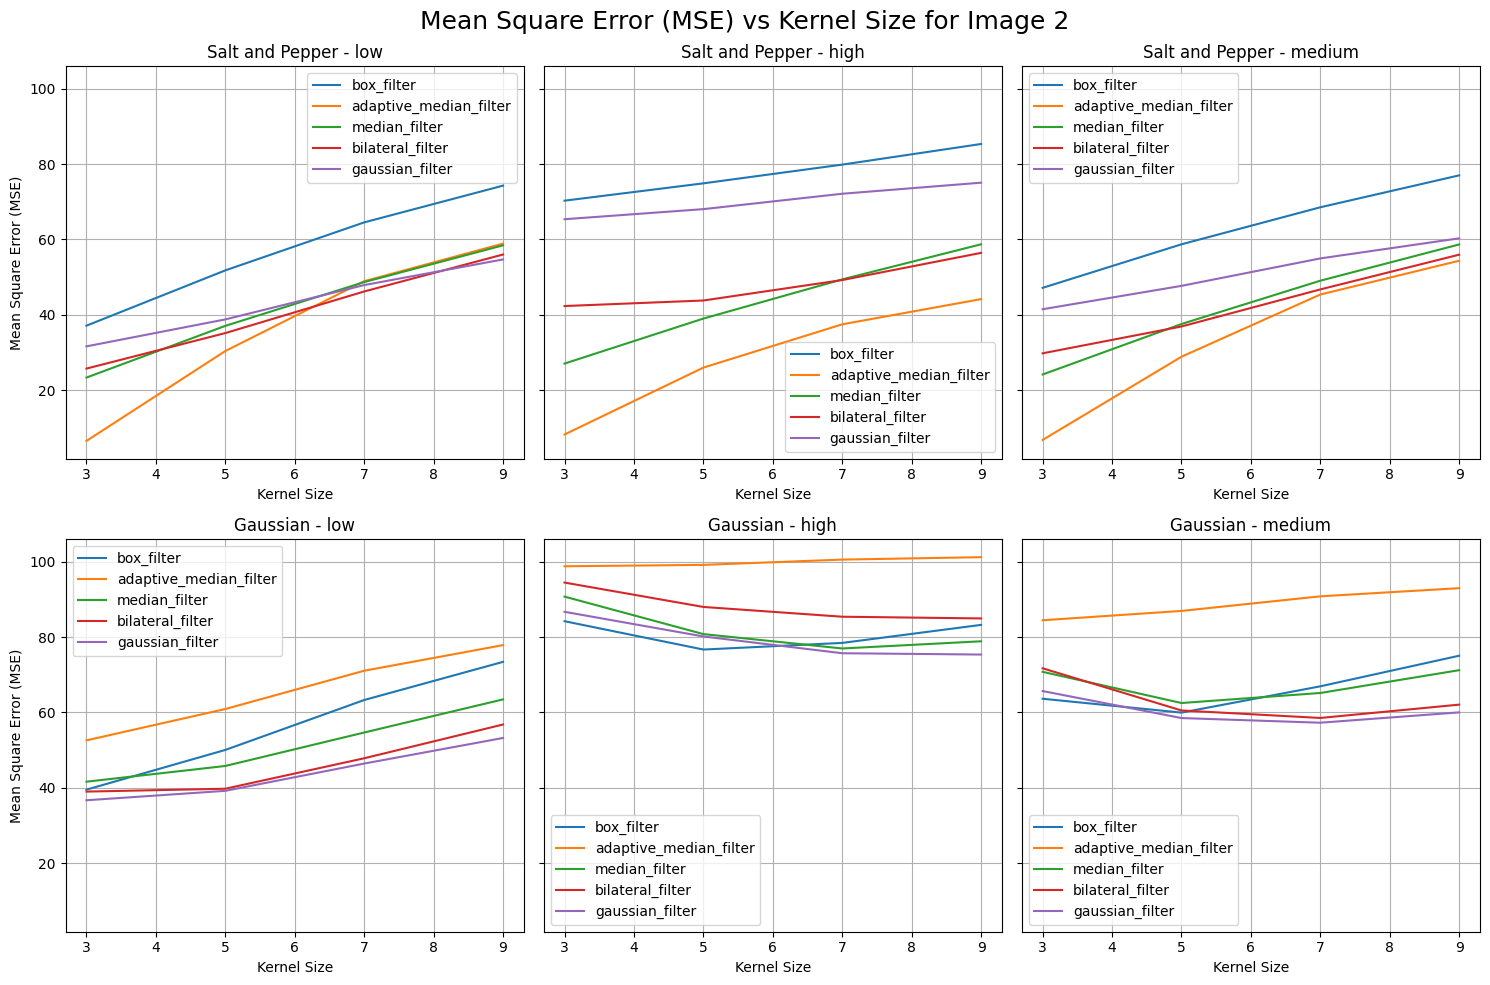

In [15]:
for i in range(len(dataframes)):

    original_image_name = f'image_{i}'
    original_image = dataframes[i].loc['no_noise', 'Image']
    

    mse_dict_outer, kernels = metrics.collect_metric_values_for_all_filters_and_noise_types(mean_squared_error, 
                                    base_dir, 
                                    original_image_name, 
                                    original_image,
                                )

    vis.plot_metric_vs_kernel(mse_dict_outer,'Mean Square Error (MSE)', noise_levels, filter_types, kernels, i)

In [16]:
image = dataframes[0].loc['no_noise', 'Image']
times = metrics.collect_filter_times(image, filter_types, kernel_sizes=kernel_sizes)

times.set_index(['Filter Type', 'Kernel Size'], inplace=True)

df_unstacked = times['Time'].unstack(level=0)

df_unstacked


Filter Type,adaptive_median_filter,bilateral_filter,box_filter,gaussian_filter,median_filter
Kernel Size,,,,,
3,1.486169,0.000352,0.000163,0.000062,0.000149
5,2.176503,0.000889,0.000213,0.000055,0.000919
7,2.115890,0.002636,0.003442,0.000124,0.002085
9,2.538830,0.004553,0.000120,0.000161,0.002461


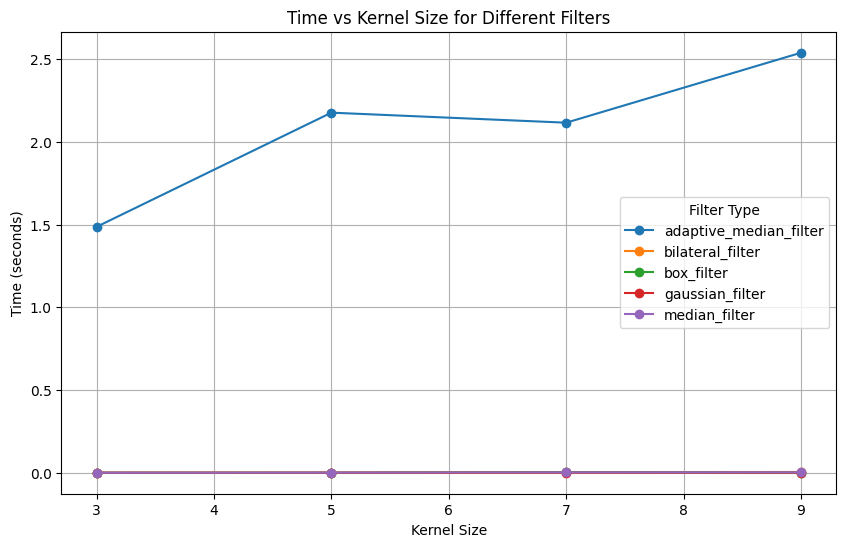

In [17]:
vis.plot_time_vs_kernel(times);

In [18]:
image = dataframes[0].loc['Salt and Pepper Noise (high)', 'Image']
times = metrics.collect_filter_times(image, filter_types, kernel_sizes=kernel_sizes)

times.set_index(['Filter Type', 'Kernel Size'], inplace=True)

df_unstacked = times['Time'].unstack(level=0)

df_unstacked

Filter Type,adaptive_median_filter,bilateral_filter,box_filter,gaussian_filter,median_filter
Kernel Size,,,,,
3,1.575832,0.000347,0.000584,0.000058,0.000156
5,2.054937,0.000919,0.000098,0.000054,0.001184
7,2.064174,0.002597,0.000109,0.000120,0.002059
9,2.253550,0.004557,0.000108,0.000156,0.002385
